## Titanic Kaggle data set Data Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')
data_train.head()
data_test.head()

train_records = data_train.shape[0]
test_records = data_test.shape[0]
number_of_features = data_train.shape[1]
print(f"The number of training samples is :{train_records}")
print(f"The number of testing samples is :{test_records}")
print(f"The number of features is : {number_of_features}")

The number of training samples is :891
The number of testing samples is :418
The number of features is : 12


### EDA on the Titanic data set



In [6]:
## checking data set columns
## create a data frame for data types
df_columns_name = list(data_train.columns)
data_train.info()
data_types_df = pd.DataFrame({"feats":list(data_train.dtypes.keys()),"dtypes":list(data_train.dtypes.values)})



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
##### 
cols_cat= list(data_types_df[data_types_df['dtypes']=='object']['feats'].values)
cols_num = list(data_types_df[data_types_df['dtypes']!='object']['feats'].values)
#### Getting dtypes directly instead of creating data frame.
categorical_cols = list(data_train.select_dtypes(include='object').columns)
numerical_cols = list(data_train.select_dtypes(exclude='object').columns)
### looping all the columns and check the data type of the each col.
cat_col =[]
num_col = []
for col in df_columns_name:
    if data_train[col].dtype in ['object']:
        cat_col.append(col)
    else:
        num_col.append(col)

In [5]:
### checking the result of different methods
# categorical_cols == cat_col
# numerical_cols == num_col

In [8]:
### checking NA values with different functions
data_train.isna() #--> will generate a binary value for each record to specify if it is nan or not!!!!!
data_train.isna().any()  ## checking if a column has any missing values or not!!!
missing_values = data_train.isna().sum() ## returns the number of the missing values for each column, its data type is pandas series, so it can be stored as variable and can be processed. 
missing_values

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Getting info from numerical and categorical data separately
for categorical data, values in each category should be checked and for numerical data types statistical description will be returned.
 

In [9]:
### define function for categorical  data checking
def data_info_cat(data, cat_col):
    for col in cat_col:
        sub_sample = data[col]
        print(f"The number of missing value for {col} is : {sub_sample.isna().sum()}")
        print(f"the number of unique values for the {col} is : {sub_sample.nunique()}")
        if sub_sample.nunique()<10:
            print(f"value counts for the {col} is : \n{sub_sample.value_counts()}")
        print("**************************************************")
        
data_info_cat(data_train,categorical_cols)

The number of missing value for Name is : 0
the number of unique values for the Name is : 891
**************************************************
The number of missing value for Sex is : 0
the number of unique values for the Sex is : 2
value counts for the Sex is : 
male      577
female    314
Name: Sex, dtype: int64
**************************************************
The number of missing value for Ticket is : 0
the number of unique values for the Ticket is : 681
**************************************************
The number of missing value for Cabin is : 687
the number of unique values for the Cabin is : 147
**************************************************
The number of missing value for Embarked is : 2
the number of unique values for the Embarked is : 3
value counts for the Embarked is : 
S    644
C    168
Q     77
Name: Embarked, dtype: int64
**************************************************


In [10]:
### define function for numerical data checking
def data_info_num(data, num_col):
    for col in num_col:
        sub_sample = data[col]
        print(f"The number of missing values for {col} is : {sub_sample.isna().sum()}")
        print(f"The statical description of {col} is :\n{sub_sample.describe()}")
data_info_num(data_train,numerical_cols)


The number of missing values for PassengerId is : 0
The statical description of PassengerId is :
count    891.000000
mean     446.000000
std      257.353842
min        1.000000
25%      223.500000
50%      446.000000
75%      668.500000
max      891.000000
Name: PassengerId, dtype: float64
The number of missing values for Survived is : 0
The statical description of Survived is :
count    891.000000
mean       0.383838
std        0.486592
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: Survived, dtype: float64
The number of missing values for Pclass is : 0
The statical description of Pclass is :
count    891.000000
mean       2.308642
std        0.836071
min        1.000000
25%        2.000000
50%        3.000000
75%        3.000000
max        3.000000
Name: Pclass, dtype: float64
The number of missing values for Age is : 177
The statical description of Age is :
count    714.000000
mean      29.699118
std       14.526497
min     

In [11]:
### Survived is float it can be defined as bool or for analysis it can be checked with value counts function
data_train['Survived'] = data_train['Survived'].astype('bool')
data_train['Survived'] = data_train['Survived'].astype("category") ## it can be defined as category data type!!!!!
data_train['Survived'].value_counts()
# plt.figure(figsize=(20,10))
# sns.countplot(x='Survived',hue='Sex',data= data_train)

False    549
True     342
Name: Survived, dtype: int64

### Doing a little EDA

#### Features Analysis

Text(0.5, 1.0, 'Survived')

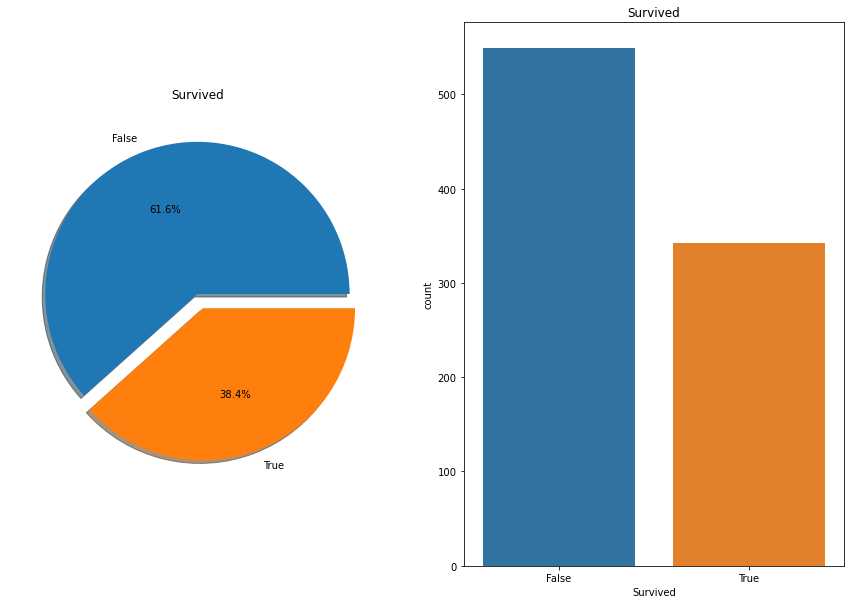

In [12]:
### Visualizing Survived 
fig, ax = plt.subplots(1,2,figsize=(15,10))
data_train['Survived'].value_counts().plot.pie(explode= [0,0.1],ax=ax[0],autopct='%1.1f%%',shadow=True)
ax[0].set_title("Survived")
ax[0].set_ylabel('')
sns.countplot("Survived",data = data_train, ax=ax[1])
ax[1].set_title("Survived")


#### Features Analysis

In [20]:
#### Feature : Sex
data_train["Survived"] = data_train["Survived"].astype("int")
data_train.groupby(['Sex','Survived'])["Survived"].count()

Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

Text(0.5, 1.0, 'Survived based on the sex')

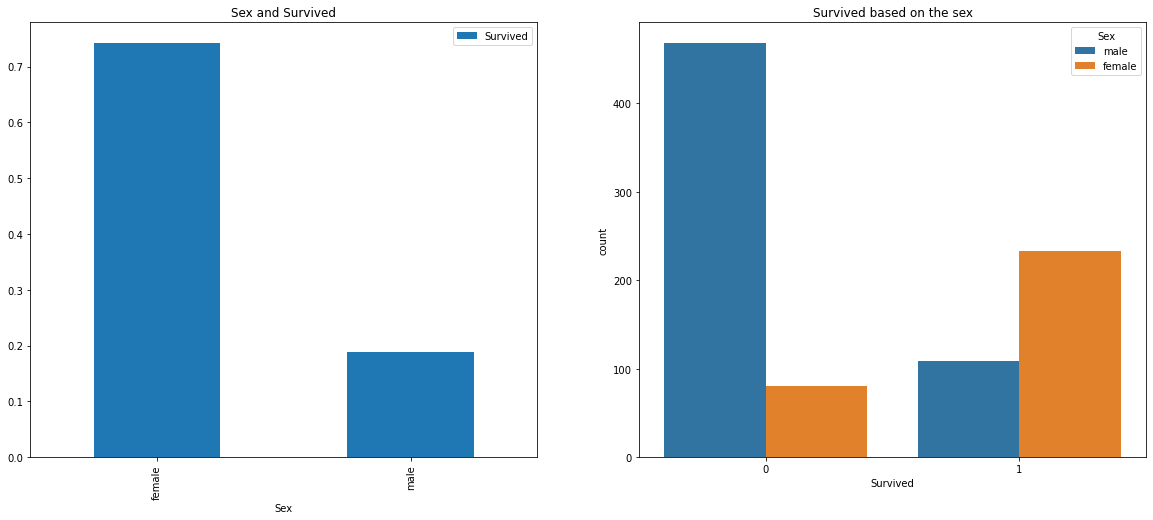

In [34]:
fig,ax = plt.subplots(1,2,figsize=(20,8))
data_train[["Sex","Survived"]].groupby(['Sex']).mean().plot.bar(ax=ax[0])
ax[0].set_title("Sex and Survived")
sns.countplot('Survived',data = data_train, hue = "Sex", ax=ax[1])
ax[1].set_title("Survived based on the sex")

### Cleaning Data (taking action for Missing values Features)